<div><span style="background-color: #222222; padding-top: 20px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 15px; font-weight: bold">Predicting Residential Condominium Prices based on the features that can be seen on lamudi.com</span></div>

**By: Ralph Roland T. Caubalejo**

Packages Included

In [1]:
import requests 
import bs4
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import numpy as np
import re
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split 
from tqdm import tqdm
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">INTRODUCTION</span></div>

<p style="text-align: justify">One of the most lucrative business in the Philippines is the Real Estate Sector.  We can see that that during the past years we have experience a sudden increase in real estate properties with the rise of many High-Rise residential Condominiums. Many Real Estate companies has been on the rise like SMDC, EPMC, Cityland and many more Real Estate Players. Lot of Big Companies are also making their own property management group so that they can have a market share on real estate boom. High Rise Residential Condominiums are usually situated in the business district like Makati City and Ortigas. During the past year, there is also an increase of condominium constructions in Bay Area specially in Pasay due to the rise of casinos in that area. Due to this, a sudden influx of prices in the real estate business is seen.</p>

<p style="text-align: justify">With this at hand, it would be beneficial if we can have machine learning model that can predict the Prices of Residential Condominium based on its distinct factors like location, size no of bedrooms and no of bathrooms. This will prove to be beneficial to a lot of business sectors specially those directly doing business in the real estate sector.</p>

**Lamudi.com**  

<p style="text-align: justify"> Lamudi.com is one of the leading real estate platform in the Philippines. It offers sellers, buyers, and renters a secure and easy-to-use platform to find or list properties online. By connecting developers, real estate agents, and private owners with property seekers, Lamudi Philippines helps individuals find their ideal house, condominium, lot, or commercial property whether for personal use or for investment purposes.Lamudi.com.ph is a part of the global group Lamudi.com. The online real estate marketplace is currently available in Latin America (Mexico) and Asia (the Philippines and Indonesia). In six years, Lamudi has already established its presence as a key real estate player in the Philippines, attracting an average of 6.6 million monthly pageviews and 140,000 monthly leads.</p> 

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">PROBLEM STATEMENT</span></div>

 ## Can we predict the Price Value of a Residential Condominium based on the features that can be seen on lamudi.com?
  
  

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">BUSINESS VALUE/HIGHLIGHTS</span></div>

**The study was able to have an accuracy of 86.87% of predicting the price of a Residential Condominium**

There are different highlights for this study, but the most important is that the model can help:

- **Real Estate Companies**: Optimize Cost Estimates for New Construction of Condominiumns


- **Real Estate Agents/Sellers**: Optimize Selling Points and Selling Prices of Condominiums


- **Real Estate Buyers**: Predict the value of Chosen Condominium Units


- **Mass Public**: Better Understanding of the Real Estate Prices



<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">METHODOLOGY/DATA SOURCES</span></div>

<p style="text-align: justify">To properly address the problem, we will be needing viable data on regarding residential condominiums in metro manila. Note that there is a wide array of selection for possible collection of data but one of the most interesting point of reference are the information on the different real estate websites. For this study, we will be using the available information on Lamudi.ph which is one of the topmost real estate websites. We will be following the general workflow defined below to arrive at a conclusion and recommendation:</p>



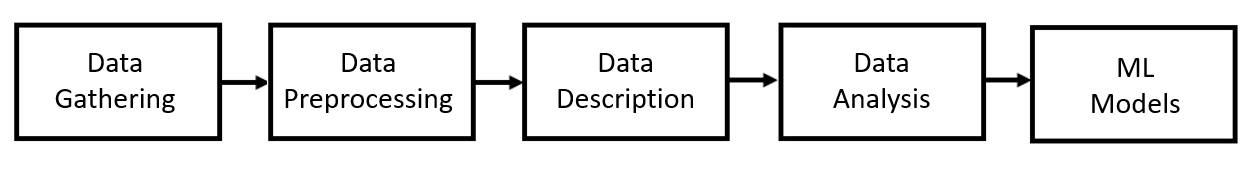

### OVERVIEW OF THE METHODOLOGY
Each step will be discussed in detail in the following sections. To give a general overview of the methodology, a brief description for each step is described below:

#### 1. Data Gathering

* For this study, we will be focusing on scraping the data on the Metro Manila Listings that can be found on the website Lamudi.ph. Using the Import Request Library function in python, we will scrape each unique listing on the website. 


* The website can be accessed through this website: https://www.lamudi.com.ph/


* A separate Jupyter Notebook is included with this study for the details of the web scraping methods and programs used. (please see ML1_Scraping_NB.ipynb) 


* The data gathered for each website is stored separately in an sql database.

#### 2. Data Preprocessing:
* Since the data was scraped, there are needed data cleaning to be done to ensure that all data can be used for the machine learning algorithm. Some of the data cleaning processes and strategies that was done are as follows:

       a). Extracting all the Needed Data from the String Values, this was done using Regular Expressions

       b). Transforming String Values to its Counterpart Float Values

       c). Dropping all Duplicated Rows of With the Same Values

       d). Dropping all Rows with incomplete Data/Null Values

       e). Dropping all Rows with Anomalous Data using Domain Knowledge

       f.) Transforming Categorical Data to Ordinal Values
   
   
* A Separate Notebook is included in this study that details all the programs and codes that was used to clean and preprocess the data. The resulting data will be then saved in to a csv file for easier access. Entitled (‘lamudi_clean.csv’)

    


#### 3. Data Description
* The resulting cleaning and preprocessing resulted to different features that will be used for the study, they are as follows:


| Column Name 	| Description 	|
|:-:	|:-:	|
| City 	| The City the Residential Condominium is located	|
| No_of_Bedroom  	| Number of Bedroom of the Residential Condominium	|
| No_of_Bathroom	| Number of Bathroom of the Residential Condominium|
| Floor_Area | The Size of the Residential Condominium in square meters|
| Latitude| The Latitude of the Residential Condominium|
| Longitude| The Longitude of the Residential Condominium|
| countnewAm| The Number of Amenities that the Building has|
| Floor_Number | The Floor where the Room is located|
| Price | The Price of the Unit in Philippine Peso|




* For the City Column, Please see the details of the category codes for their respective cities:

| Category Type| City|
|:-:|:-:|
| 0| Antipolo|
| 1| Las Piñas|
| 2| Makati|
| 3| TMandaluyong|
| 4| Manila|
| 5| Muntinlupa|
| 6| Parañaque|
| 7| Pasay|
| 8| Pasig|
| 9| Quezon City|
| 10| San Juan|
| 11| Taguig|



#### 4. Exploratory Data Analysis

* Before running the data in the different machine learning models, it is very important to extrapolate different data analysis to have a clearer view of the possible working methods we can use.

     a). General Pairplot of the Values


#### 5. Machine Learning Algorithm

* To answer the problem at hand, we will be needing to fit our data in to different machine learning models available. Since the target is the price of the residential condominiums, then we can treat the study as a regression problem which should addressed by regression models.


* Since out data involves geographical features, the data should not be scaled so that the integrity of the latitude and longitude values are preserved. Due to this, the most effective machine learning models that should be used are ensemble methods where scaling is not mandatory. Nevertheless, we still try to  model the data into all possible linear regression models.


* For this study, we will be adding new machine learning models that are not tackled on class since there are a lot of ensemble methods that can be used for this data. The additional methods to be used are:
    
    
        a). Extra Trees Regressor
        b). XGB Regressor
        c). Lightboost Regressor
        d). Catboost Regressor
        e). Voting Regressor
    
* Also, we will be running the data with the following machine learning models:
    
       a). Linear Regression
       b). Ridge Regression
       c). Lasso Regression
       d). KNN Regression
       e). Decision Tree Regression
       f). Random Forest Regression
       g). Gradient Boosting Regression

#### 6. Results and Discussion

* Since we need to optimize the parameters of the machine learning models, a separate notebook is used to find all the optimization parameters for all the models. 


* Please see Jupyter Notebook ML1_Scraping_NB.ipynb.


* Now that we know all the Optimization Parameters, we will be running the data including the optimization parameters to check the most suited model for the dataset.


* We will also be including the Different Regression metrics to find out the best model.


<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">METHODS & DISCUSSIONS</span></div>

Let us load the Clean Data. For the Scraping and Cleaning Section, due to long program and code, it was done in a seperate notebook included in this study. Please refer to ML1_Scraping_NB.ipynb.

The Clean Dataset involves 6521 Unique Residential Condominiums Listings. The Description of each columns is described in the methodology part

In [100]:
df = pd.read_csv('lamudi_clean.csv')
df

,City,Amount,No_of_Bedroom,No_of_Baths,Floor_Area,Latitude,L0ngitude,countnewAm,floor_number
0,4,8500000.0,2.0,2.0,52.000,14.558112,120.993771,17,10.0
1,10,15700000.0,2.0,1.0,132.390,14.603980,121.045000,4,2.0
2,9,3300000.0,1.0,1.0,23.000,14.651189,121.032754,24,18.0
3,3,4500000.0,1.0,1.0,30.260,14.572573,121.048343,33,15.0
4,8,20645110.0,3.0,3.0,129.000,14.582640,121.078700,93,28.0
...,...,...,...,...,...,...,...,...,...
6516,1,6500000.0,2.0,1.0,58.000,14.468350,120.969780,36,5.0
6517,3,2300000.0,1.0,1.0,20.010,14.574420,121.050700,20,15.0
6518,2,10300000.0,1.0,1.0,29.000,14.566278,121.037020,34,10.0
6519,9,5400000.0,2.0,2.0,92.512,14.662144,121.044309,6,30.0


In [101]:
df.describe()

,City,Amount,No_of_Bedroom,No_of_Baths,Floor_Area,Latitude,L0ngitude,countnewAm,floor_number
count,6521.000000,6.521000e+03,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000
mean,6.404999,7.721297e+06,1.504524,1.251035,49.418556,14.568050,121.047847,23.544855,20.036651
std,3.149676,5.796081e+06,0.672204,0.542101,27.107185,0.051748,0.055564,18.559931,13.856873
min,0.000000,2.000000e+06,1.000000,1.000000,11.000000,14.395140,120.961826,1.000000,0.000000
25%,3.000000,4.000000e+06,1.000000,1.000000,29.000000,14.551476,121.025740,10.000000,9.000000
50%,8.000000,5.600000e+06,1.000000,1.000000,41.710000,14.572616,121.048266,19.000000,18.000000
75%,9.000000,9.000000e+06,2.000000,1.000000,63.000000,14.596275,121.060255,31.000000,28.000000
max,11.000000,3.000000e+07,5.000000,4.000000,200.000000,14.746820,122.266475,93.000000,70.000000


Based on the initial description of the dataset, we can derive the following analysis:

*  **Average Size** of Floor Area seen on the Dataset: 49.42 sqm


*  **Average Cost** of Residential Condominiums on the Dataset: Php 7.72 Million Pesos

Additional Data Analysis will be shown after the Machine Learning Models are fitted.

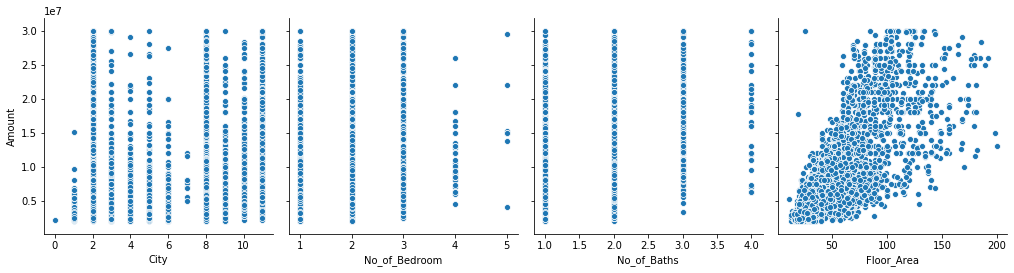

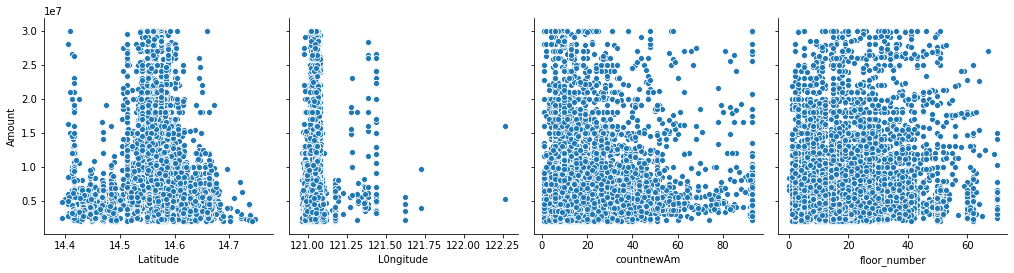

In [102]:

sns.pairplot(df, y_vars='Amount',x_vars=['City','No_of_Bedroom','No_of_Baths','Floor_Area'],height=3.5)

sns.pairplot(df, y_vars='Amount',x_vars=['Latitude','L0ngitude','countnewAm','floor_number'],height=3.5)
plt.show()


Based on the Pair Plot seen above, we can see that few data points can be considered as discreet and some are continuous. It is know worthy to show that the floor area pairplot is showing a linear trend with the amount which is our target for this study.

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">MACHINE LEARNING MODELS</span></div>

For this part of the study, we will then be fiiting the dataset to different machine learning models available on the SKLearn Library and some new machine learning models as described on the methodology part.

Since Machine Learning Models needs to have the needed parameters, we will then need to optimize the tuning parameters of each model. This will be done by using **GridSearchCV** on each model. Due to Long duration of the optimzation, this is done in another notebook. All the optimization parameters will be save to a csv file which will be preloaded for this notebook. (Pleasee see ML1_Scraping_NB.ipynb for the gridsearch programs)

In [103]:
df2 = pd.read_csv('Tuning_Parameters.csv',index_col='Unnamed: 0')
df2

,Train_Accuracy,Test_Accuracy,Optimal Parameter
KNN,0.9999411172683343,0.643385,12.0
LR,0.6237986647892372,0.625265,NaN
Ridge,0.6237986647892374,0.625265,1e-12
Lasso,0.6237986647892374,0.625265,1e-12
DecisionTree,0.9999720274597834,0.762213,7.0
RandomForest,Used Grid Search,0.841401,"{'max_depth': 20, 'max_features': 0.4, 'min_sa..."
Extra Tree,Used Grid Search,0.843967,"{'max_depth': 26, 'max_features': 'log2', 'min..."
Gradient Boosting,Used Grid Search,0.851929,"{'learning_rate': 0.05, 'max_depth': 6, 'max_f..."
XGB,Used Grid Search,0.835656,"{'learning_rate': 0.05, 'max_depth': 6, 'n_est..."
Lightboost,Used Grid Search,0.834586,"{'learning_rate': 0.05, 'max_depth': 6, 'max_f..."


In [104]:
print('For Random Forest\n',df2['Optimal Parameter'][5])

For Random Forest
 {'max_depth': 20, 'max_features': 0.4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [105]:
print('For Extra Tree\n',df2['Optimal Parameter']['Extra Tree'])

For Extra Tree
 {'max_depth': 26, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 700}


In [106]:
print('For Gradient Boosting\n',df2['Optimal Parameter']['Gradient Boosting'])

For Gradient Boosting
 {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 900}


In [107]:
print('For XGB\n',df2['Optimal Parameter']['XGB'])

For XGB
 {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 600}


In [108]:
print('For Lightboost\n',df2['Optimal Parameter']['Lightboost'])

For Lightboost
 {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 0.4, 'n_estimators': 600}


In [109]:
print('For Catboost\n',df2['Optimal Parameter']['Catboost'])

For Catboost
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1200}


Now that we have the Optimization Parameters for each machine learning model, we will now fit each learning model to the dataset, we will also show different regression metrics to show the best model to choose. For this study, we will using the different regression metrics:
* Root Mean Squared Error
* Mean Absolute Error
* Median Absolute Error
* R2 Score


We will use 10 Different Random Trials to have a Good Understanding of the Model and Results:

In [110]:
X = df.drop(['Amount'], axis=1)
y = df['Amount']

yz = 10
lra = []
lasa = []
rida = []
knna = []
dta = []
rfa = []
gbma = []
vma = []
etm = []
xgb = []
lbm = []
cat = []

lra1 = []
lasa1 = []
rida1 = []
knna1 = []
dta1 = []
rfa1 = []
gbma1 = []
vma1 = []
etm1 = []
xgb1 = []
lbm1 = []
cat1 = []

lrae = []
lasae = []
ridae = []
knnae = []
dtae = []
rfae = []
gbmae = []
vmae = []
etme = []
xgbe = []
lbme = []
cate = []

lrlist = []
laslist = []
ridlist = []
knnlist = []
dtlist = []
rflist = []
gbmlist = []
vmalist = []
etmlist = []
xgblist = []
lbmlist = []
catlist = []

with tqdm(total=len(range(0, yz))) as pb:
    for trials in range(0, yz):
        from sklearn.linear_model import Lasso
        X = df.drop(['Amount'], axis=1)
        y = df['Amount']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,test_size=0.2, random_state=trials)
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train,test_size=0.2, random_state=trials)
        
        pb.set_description(f'Iter: {trials+1}')

        LR = LinearRegression()
        LR.fit(X_train, y_train)
        LR_rmse = mean_squared_error(y_train, LR.predict(X_train), squared=False)
        LR_mae = mean_absolute_error(y_train, LR.predict(X_train))
        LR_medae = median_absolute_error(y_train, LR.predict(X_train))

        LR_rmse1 = mean_squared_error(y_test, LR.predict(X_test), squared=False)
        LR_mae1 = mean_absolute_error(y_test, LR.predict(X_test))
        LR_medae1 = median_absolute_error(y_test, LR.predict(X_test))
        
        Lasso1 = Lasso(alpha=1e-12, max_iter=10000, tol=1e-20)
        Lasso1.fit(X_train, y_train)

        Lasso_rmse = mean_squared_error(y_train, Lasso1.predict(X_train), squared=False)
        Lasso_mae = mean_absolute_error(y_train, Lasso1.predict(X_train))
        Lasso_medae = median_absolute_error(y_train, Lasso1.predict(X_train))

        Lasso_rmse1 = mean_squared_error(y_test, Lasso1.predict(X_test), squared=False)
        Lasso_mae1 = mean_absolute_error(y_test, Lasso1.predict(X_test))
        Lasso_medae1 = median_absolute_error(y_test, Lasso1.predict(X_test))
        
        Ridge1 = Ridge(alpha=1e-12)
        Ridge1.fit(X_train, y_train)
        Ridge1_rmse = mean_squared_error(y_train, Ridge1.predict(X_train), squared=False)
        Ridge1_mae = mean_absolute_error(y_train, Ridge1.predict(X_train))
        Ridge1_medae = median_absolute_error(y_train, Ridge1.predict(X_train))

        Ridge1_rmse1 = mean_squared_error(y_test, Ridge1.predict(X_test), squared=False)
        Ridge1_mae1 = mean_absolute_error(y_test, Ridge1.predict(X_test))
        Ridge1_medae1 = median_absolute_error(y_test, Ridge1.predict(X_test))
        
        kNN = KNeighborsRegressor(n_neighbors=12)
        kNN.fit(X_train, y_train)
        kNN_rmse = mean_squared_error(y_train, kNN.predict(X_train), squared=False)
        kNN_mae = mean_absolute_error(y_train, kNN.predict(X_train))
        kNN_medae = median_absolute_error(y_train, kNN.predict(X_train))

        kNN_rmse1 = mean_squared_error(y_test, kNN.predict(X_test), squared=False)
        kNN_mae1 = mean_absolute_error(y_test, kNN.predict(X_test))
        kNN_medae1 = median_absolute_error(y_test, kNN.predict(X_test))
        
        DT = DecisionTreeRegressor(max_depth=7)
        DT.fit(X_train, y_train)
        DT_rmse = mean_squared_error(y_train, DT.predict(X_train), squared=False)
        DT_mae = mean_absolute_error(y_train, DT.predict(X_train))
        DT_medae = median_absolute_error(y_train, DT.predict(X_train))

        DT_rmse1 = mean_squared_error(y_test, DT.predict(X_test), squared=False)
        DT_mae1 = mean_absolute_error(y_test, DT.predict(X_test))
        DT_medae1 = median_absolute_error(y_test, DT.predict(X_test))
        
        RF = RandomForestRegressor(
            max_depth=20, max_features=0.4, min_samples_leaf=1, n_estimators=300, n_jobs=-1)
        RF.fit(X_train, y_train)
        RF_rmse = mean_squared_error(y_train, RF.predict(X_train), squared=False)
        RF_mae = mean_absolute_error(y_train, RF.predict(X_train))
        RF_medae = median_absolute_error(y_train, RF.predict(X_train))
        
        RF_rmse1 = mean_squared_error(y_test, RF.predict(X_test), squared=False)
        RF_mae1 = mean_absolute_error(y_test, RF.predict(X_test))
        RF_medae1 = median_absolute_error(y_test, RF.predict(X_test))

        GBM = GradientBoostingRegressor(
            learning_rate=0.05, max_depth=6, max_features='sqrt', min_samples_leaf=1, n_estimators=900)
        GBM.fit(X_train, y_train)
        GBM_rmse = mean_squared_error(y_train, GBM.predict(X_train), squared=False)
        GBM_mae = mean_absolute_error(y_train, GBM.predict(X_train))
        GBM_medae = median_absolute_error(y_train, GBM.predict(X_train))
        
        GBM_rmse1 = mean_squared_error(y_test, GBM.predict(X_test), squared=False)
        GBM_mae1 = mean_absolute_error(y_test, GBM.predict(X_test))
        GBM_medae1= median_absolute_error(y_test, GBM.predict(X_test))

        reg1 = GradientBoostingRegressor(
            learning_rate=0.05, max_depth=6, max_features='sqrt', min_samples_leaf=1, n_estimators=900)
        reg2 = RandomForestRegressor(
            max_depth=20, max_features=0.4, min_samples_leaf=1, n_estimators=300, n_jobs=-1)
        reg3 = ExtraTreesRegressor(
            max_depth=26, max_features='log2', min_samples_leaf=1, n_estimators=700, n_jobs=-1)
        reg4 = LGBMRegressor(learning_rate=0.05, max_depth=6, max_features=2,
                           min_samples_leaf=0.4, n_estimators=600, n_jobs=-1)
        reg5 = CatBoostRegressor(
            verbose=False, max_depth=6, n_estimators=1200, learning_rate=0.1)
        reg = VotingRegressor(
            estimators=[('gb', reg1),('et', reg2)], n_jobs=-1)
        reg.fit(X_train, y_train)
        reg_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
        reg_mae = mean_absolute_error(y_train, reg.predict(X_train))
        reg_medae = median_absolute_error(y_train, reg.predict(X_train))
        
        reg_rmse1 = mean_squared_error(y_test, reg.predict(X_test), squared=False)
        reg_mae1 = mean_absolute_error(y_test, reg.predict(X_test))
        reg_medae1 = median_absolute_error(y_test, reg.predict(X_test))

        et = ExtraTreesRegressor(
            max_depth=26, max_features='log2', min_samples_leaf=1, n_estimators=700, n_jobs=-1)
        et.fit(X_train, y_train)
        et_rmse = mean_squared_error(y_train, et.predict(X_train), squared=False)
        et_mae = mean_absolute_error(y_train, et.predict(X_train))
        et_medae = median_absolute_error(y_train, et.predict(X_train))
        
        et_rmse1 = mean_squared_error(y_test, et.predict(X_test), squared=False)
        et_mae1 = mean_absolute_error(y_test, et.predict(X_test))
        et_medae1 = median_absolute_error(y_test, et.predict(X_test))

        xg = XGBRegressor(learning_rate=0.05, max_depth=6,
                          n_estimators=600, n_jobs=-1)
        xg.fit(X_train, y_train)
        xg_rmse = mean_squared_error(y_train, xg.predict(X_train), squared=False)
        xg_mae = mean_absolute_error(y_train, xg.predict(X_train))
        xg_medae = median_absolute_error(y_train, xg.predict(X_train))
        
        xg_rmse1 = mean_squared_error(y_test, xg.predict(X_test), squared=False)
        xg_mae1 = mean_absolute_error(y_test, xg.predict(X_test))
        xg_medae1 = median_absolute_error(y_test, xg.predict(X_test))

        lb = LGBMRegressor(learning_rate=0.05, max_depth=6, max_features=2,
                           min_samples_leaf=0.4, n_estimators=600, n_jobs=-1)
        lb.fit(X_train, y_train)
        
        lb_rmse = mean_squared_error(y_train, lb.predict(X_train), squared=False)
        lb_mae = mean_absolute_error(y_train, lb.predict(X_train))
        lb_medae = median_absolute_error(y_train, lb.predict(X_train))
        
        lb_rmse1 = mean_squared_error(y_test, lb.predict(X_test), squared=False)
        lb_mae1 = mean_absolute_error(y_test, lb.predict(X_test))
        lb_medae1 = median_absolute_error(y_test, lb.predict(X_test))

        catb = CatBoostRegressor(
            verbose=False, max_depth=6, n_estimators=1200, learning_rate=0.1)
        catb.fit(X_train, y_train)
        catb_rmse = mean_squared_error(y_train, catb.predict(X_train), squared=False)
        catb_mae = mean_absolute_error(y_train, catb.predict(X_train))
        catb_medae = median_absolute_error(y_train, catb.predict(X_train))
        
        catb_rmse1 = mean_squared_error(y_test, catb.predict(X_test), squared=False)
        catb_mae1 = mean_absolute_error(y_test, catb.predict(X_test))
        catb_medae1 = median_absolute_error(y_test, catb.predict(X_test))

        lrae.append([LR_rmse, LR_mae, LR_medae,LR_rmse1, LR_mae1, LR_medae1])
        lasae.append([Lasso_rmse, Lasso_mae, Lasso_medae,Lasso_rmse1, Lasso_mae1, Lasso_medae1])
        ridae.append([Ridge1_rmse, Ridge1_mae, Ridge1_medae,Ridge1_rmse1, Ridge1_mae1, Ridge1_medae1])
        knnae.append([kNN_rmse, kNN_mae, kNN_medae,kNN_rmse1, kNN_mae1, kNN_medae1])
        dtae.append([DT_rmse, DT_mae, DT_medae,DT_rmse1, DT_mae1, DT_medae1])
        rfae.append([RF_rmse, RF_mae, RF_medae,RF_rmse1, RF_mae1, RF_medae1])
        gbmae.append([GBM_rmse, GBM_mae, GBM_medae,GBM_rmse1, GBM_mae1, GBM_medae1])
        vmae.append([reg_rmse, reg_mae, reg_medae,reg_rmse1, reg_mae1, reg_medae1])
        etme.append([et_rmse, et_mae, et_medae,et_rmse1, et_mae1, et_medae1])
        xgbe.append([xg_rmse, xg_mae, xg_medae,xg_rmse1, xg_mae1, xg_medae1])
        lbme.append([lb_rmse, lb_mae, lb_medae,lb_rmse1, lb_mae1, lb_medae1])
        cate.append([catb_rmse, catb_mae, catb_medae,catb_rmse1, catb_mae1, catb_medae1])

        lra.append(LR.score(X_train, y_train))
        lasa.append(Lasso1.score(X_train, y_train))
        rida.append(Ridge1.score(X_train, y_train))
        knna.append(kNN.score(X_train, y_train))
        dta.append(DT.score(X_train, y_train))
        rfa.append(RF.score(X_train, y_train))
        gbma.append(GBM.score(X_train, y_train))
        vma.append(reg.score(X_train, y_train))
        etm.append(et.score(X_train, y_train))
        xgb.append(xg.score(X_train, y_train))
        lbm.append(lb.score(X_train, y_train))
        cat.append(catb.score(X_train, y_train))
        
        lra1.append(LR.score(X_val, y_val))
        lasa1.append(Lasso1.score(X_val, y_val))
        rida1.append(Ridge1.score(X_val, y_val))
        knna1.append(kNN.score(X_val, y_val))
        dta1.append(DT.score(X_val, y_val))
        rfa1.append(RF.score(X_val, y_val))
        gbma1.append(GBM.score(X_val, y_val))
        vma1.append(reg.score(X_val, y_val))
        etm1.append(et.score(X_val, y_val))
        xgb1.append(xg.score(X_val, y_val))
        lbm1.append(lb.score(X_val, y_val))
        cat1.append(catb.score(X_val, y_val))

        lrlist.append(LR.score(X_test, y_test))
        laslist.append(Lasso1.score(X_test, y_test))
        ridlist.append(Ridge1.score(X_test, y_test))
        knnlist.append(kNN.score(X_test, y_test))
        dtlist.append(DT.score(X_test, y_test))
        rflist.append(RF.score(X_test, y_test))
        gbmlist.append(GBM.score(X_test, y_test))
        vmalist.append(reg.score(X_test, y_test))
        etmlist.append(et.score(X_test, y_test))
        xgblist.append(xg.score(X_test, y_test))
        lbmlist.append(lb.score(X_test, y_test))
        catlist.append(catb.score(X_test, y_test))
        pb.update(1)

cols = ['Method', 'Train Accuracy', 'Test Accuracy', 'Val Accuracy']
pf = pd.DataFrame(columns=cols)
pf.loc[0] = ['Linear Regression', np.array(lra).mean(), np.array(lrlist).mean(), np.array(lra1).mean()]
pf.loc[1] = ['Lasso', np.array(lasa).mean(), np.array(laslist).mean(), np.array(lasa1).mean()]
pf.loc[2] = ['Ridge', np.array(rida).mean(), np.array(ridlist).mean(), np.array(rida1).mean()]
pf.loc[3] = ['KNN', np.array(knna).mean(), np.array(knnlist).mean(), np.array(knna1).mean()]
pf.loc[4] = ['Decision Tree', np.array(dta).mean(), np.array(dtlist).mean(), np.array(dta1).mean()]
pf.loc[5] = ['Random Forest', np.array(rfa).mean(), np.array(rflist).mean(), np.array(rfa1).mean()]
pf.loc[6] = ['Gradient Boosting Method', np.array(gbma).mean(), np.array(gbmlist).mean(), np.array(gbma1).mean()]
pf.loc[7] = ['Voting Regressor', np.array(vma).mean(), np.array(vmalist).mean(), np.array(vma1).mean()]
pf.loc[8] = ['Extra Trees', np.array(etm).mean(), np.array(etmlist).mean(), np.array(etm1).mean()]
pf.loc[9] = ['XGB', np.array(xgb).mean(), np.array(xgblist).mean(), np.array(xgb1).mean()]
pf.loc[10] = ['Light', np.array(lbm).mean(), np.array(lbmlist).mean(), np.array(lbm1).mean()]
pf.loc[11] = ['Catboost', np.array(cat).mean(), np.array(catlist).mean(), np.array(cat1).mean()]

cols1 = ['RMSE_Train', 'MAE_Train', 'MEDAE_Train','RMSE_Test', 'MAE_Test', 'MEDAE_Test']
pf1 = pd.DataFrame(columns=cols1)
pf1.loc['Linear Regression'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Lasso'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Ridge'] = (np.array([ridae]).mean(axis=1)).tolist()[0]
pf1.loc['KNN'] = (np.array([knnae]).mean(axis=1)).tolist()[0]
pf1.loc['Decision Tree'] = (np.array([dtae]).mean(axis=1)).tolist()[0]
pf1.loc['Random Forest'] = (np.array([rfae]).mean(axis=1)).tolist()[0]
pf1.loc['Gradient Boosting Method'] = (
    np.array([gbmae]).mean(axis=1)).tolist()[0]
pf1.loc['Voting Regressor'] = (np.array([vmae]).mean(axis=1)).tolist()[0]
pf1.loc['Extra Trees'] = (np.array([etme]).mean(axis=1)).tolist()[0]
pf1.loc['XGB'] = (np.array([xgbe]).mean(axis=1)).tolist()[0]
pf1.loc['Light'] = (np.array([lbme]).mean(axis=1)).tolist()[0]
pf1.loc['Catboost'] = (np.array([cate]).mean(axis=1)).tolist()[0]

pf3 = pd.merge(pf, pf1, left_on='Method', right_on=pf1.index)
pf3['RMSE_Train'] = pf3['RMSE_Train'].map('{:,.0f}'.format)
pf3['MAE_Train'] = pf3['MAE_Train'].map('{:,.0f}'.format)
pf3['MEDAE_Train'] = pf3['MEDAE_Train'].map('{:,.0f}'.format)
pf3['RMSE_Test'] = pf3['RMSE_Test'].map('{:,.0f}'.format)
pf3['MAE_Test'] = pf3['MAE_Test'].map('{:,.0f}'.format)
pf3['MEDAE_Test'] = pf3['MEDAE_Test'].map('{:,.0f}'.format)
pf3

Iter: 10: 100%|██████████| 10/10 [02:33<00:00, 15.31s/it]


,Method,Train Accuracy,Test Accuracy,Val Accuracy,RMSE_Train,MAE_Train,MEDAE_Train,RMSE_Test,MAE_Test,MEDAE_Test
0,Linear Regression,0.620895,0.630807,0.627237,"3,553,492","2,431,752","1,647,921","3,552,596","2,450,443","1,660,758"
1,Lasso,0.620895,0.630807,0.627237,"3,553,492","2,431,752","1,647,921","3,552,596","2,450,443","1,660,758"
2,Ridge,0.620895,0.630807,0.627237,"3,553,492","2,431,752","1,647,921","3,552,596","2,450,443","1,660,758"
3,KNN,0.684266,0.637647,0.633712,"3,242,418","2,153,141","1,307,103","3,518,816","2,356,994","1,440,159"
4,Decision Tree,0.840145,0.758015,0.753660,"2,306,909","1,494,183","946,734","2,874,723","1,774,066","1,030,969"
5,Random Forest,0.979627,0.858154,0.861695,"823,643","512,101","299,054","2,200,541","1,358,542","781,768"
6,Gradient Boosting Method,0.988756,0.861714,0.864955,"611,901","428,491","294,507","2,171,689","1,344,008","780,596"
7,Voting Regressor,0.986949,0.865310,0.868553,"659,222","457,810","306,803","2,144,174","1,320,704","757,282"
8,Extra Trees,0.999899,0.856595,0.858083,"57,899","25,149","7,820","2,212,823","1,352,542","768,695"
9,XGB,0.979606,0.852573,0.860630,"823,936","577,931","398,819","2,241,259","1,371,439","781,808"


**NOTE:** As you can see on the results,using the optimized parameters, we actually say that the model is **overfitting** on the training set since its accuracy is way above the accuracy of the test set. Due to this, we will need to turn down our hyper parameters to find the sweetspot where the training and test accuracy are not far apart.

To determine the right parameters where not to overfit, we will be know doing manual changing of some of the parameters to determine the sweet spot. To do this, i made a for loop over the dataset going through each parameters, another notebook is done to see the variation as the parameter changes.(Please see ML1_ForLoop_NB.ipynb)

From the graphs, i choose the sweet spot for the parameters where the gap of the test accuracy and train accuracy is not that big. The program below uses the **sweet parameters** as i call it.

In [123]:
X = df.drop(['Amount'], axis=1)
y = df['Amount']

yz = 10
lra = []
lasa = []
rida = []
knna = []
dta = []
rfa = []
gbma = []
vma = []
etm = []
xgb = []
lbm = []
cat = []

lra1 = []
lasa1 = []
rida1 = []
knna1 = []
dta1 = []
rfa1 = []
gbma1 = []
vma1 = []
etm1 = []
xgb1 = []
lbm1 = []
cat1 = []

lrae = []
lasae = []
ridae = []
knnae = []
dtae = []
rfae = []
gbmae = []
vmae = []
etme = []
xgbe = []
lbme = []
cate = []

lrlist = []
laslist = []
ridlist = []
knnlist = []
dtlist = []
rflist = []
gbmlist = []
vmalist = []
etmlist = []
xgblist = []
lbmlist = []
catlist = []

with tqdm(total=len(range(0, yz))) as pb:
    for trials in range(0, yz):
        from sklearn.linear_model import Lasso
        X = df.drop(['Amount'], axis=1)
        y = df['Amount']

        X_train, X_test, y_train, y_test = train_test_split(
            X, y,test_size=0.2, random_state=trials)
        
        pb.set_description(f'Iter: {trials+1}')

        LR = LinearRegression()
        LR.fit(X_train, y_train)
        LR_rmse = mean_squared_error(y_train, LR.predict(X_train), squared=False)
        LR_mae = mean_absolute_error(y_train, LR.predict(X_train))
        LR_medae = median_absolute_error(y_train, LR.predict(X_train))

        LR_rmse1 = mean_squared_error(y_test, LR.predict(X_test), squared=False)
        LR_mae1 = mean_absolute_error(y_test, LR.predict(X_test))
        LR_medae1 = median_absolute_error(y_test, LR.predict(X_test))
        
        Lasso1 = Lasso(alpha=1e-12, max_iter=10000, tol=1e-20)
        Lasso1.fit(X_train, y_train)

        Lasso_rmse = mean_squared_error(y_train, Lasso1.predict(X_train), squared=False)
        Lasso_mae = mean_absolute_error(y_train, Lasso1.predict(X_train))
        Lasso_medae = median_absolute_error(y_train, Lasso1.predict(X_train))

        Lasso_rmse1 = mean_squared_error(y_test, Lasso1.predict(X_test), squared=False)
        Lasso_mae1 = mean_absolute_error(y_test, Lasso1.predict(X_test))
        Lasso_medae1 = median_absolute_error(y_test, Lasso1.predict(X_test))
        
        Ridge1 = Ridge(alpha=1e-12)
        Ridge1.fit(X_train, y_train)
        Ridge1_rmse = mean_squared_error(y_train, Ridge1.predict(X_train), squared=False)
        Ridge1_mae = mean_absolute_error(y_train, Ridge1.predict(X_train))
        Ridge1_medae = median_absolute_error(y_train, Ridge1.predict(X_train))

        Ridge1_rmse1 = mean_squared_error(y_test, Ridge1.predict(X_test), squared=False)
        Ridge1_mae1 = mean_absolute_error(y_test, Ridge1.predict(X_test))
        Ridge1_medae1 = median_absolute_error(y_test, Ridge1.predict(X_test))
        
        kNN = KNeighborsRegressor(n_neighbors=12)
        kNN.fit(X_train, y_train)
        kNN_rmse = mean_squared_error(y_train, kNN.predict(X_train), squared=False)
        kNN_mae = mean_absolute_error(y_train, kNN.predict(X_train))
        kNN_medae = median_absolute_error(y_train, kNN.predict(X_train))

        kNN_rmse1 = mean_squared_error(y_test, kNN.predict(X_test), squared=False)
        kNN_mae1 = mean_absolute_error(y_test, kNN.predict(X_test))
        kNN_medae1 = median_absolute_error(y_test, kNN.predict(X_test))
        
        DT = DecisionTreeRegressor(max_depth=7)
        DT.fit(X_train, y_train)
        DT_rmse = mean_squared_error(y_train, DT.predict(X_train), squared=False)
        DT_mae = mean_absolute_error(y_train, DT.predict(X_train))
        DT_medae = median_absolute_error(y_train, DT.predict(X_train))

        DT_rmse1 = mean_squared_error(y_test, DT.predict(X_test), squared=False)
        DT_mae1 = mean_absolute_error(y_test, DT.predict(X_test))
        DT_medae1 = median_absolute_error(y_test, DT.predict(X_test))
        
        RF = RandomForestRegressor(
            max_depth=8, n_estimators=100, n_jobs=-1)
        RF.fit(X_train, y_train)
        RF_rmse = mean_squared_error(y_train, RF.predict(X_train), squared=False)
        RF_mae = mean_absolute_error(y_train, RF.predict(X_train))
        RF_medae = median_absolute_error(y_train, RF.predict(X_train))
        
        RF_rmse1 = mean_squared_error(y_test, RF.predict(X_test), squared=False)
        RF_mae1 = mean_absolute_error(y_test, RF.predict(X_test))
        RF_medae1 = median_absolute_error(y_test, RF.predict(X_test))

        GBM = GradientBoostingRegressor(learning_rate=0.075, max_depth=6, n_estimators=100)
        GBM.fit(X_train, y_train)
        GBM_rmse = mean_squared_error(y_train, GBM.predict(X_train), squared=False)
        GBM_mae = mean_absolute_error(y_train, GBM.predict(X_train))
        GBM_medae = median_absolute_error(y_train, GBM.predict(X_train))
        
        GBM_rmse1 = mean_squared_error(y_test, GBM.predict(X_test), squared=False)
        GBM_mae1 = mean_absolute_error(y_test, GBM.predict(X_test))
        GBM_medae1= median_absolute_error(y_test, GBM.predict(X_test))

        reg1 = GradientBoostingRegressor(learning_rate=0.075, max_depth=6, n_estimators=100)
        reg2 = LGBMRegressor(learning_rate=0.075, max_depth=7, n_estimators=100, n_jobs=-1)

        reg = VotingRegressor(estimators=[('gb', reg1),('lb', reg2)], n_jobs=-1)
        reg.fit(X_train, y_train)
        reg_rmse = mean_squared_error(y_train, reg.predict(X_train), squared=False)
        reg_mae = mean_absolute_error(y_train, reg.predict(X_train))
        reg_medae = median_absolute_error(y_train, reg.predict(X_train))
        
        reg_rmse1 = mean_squared_error(y_test, reg.predict(X_test), squared=False)
        reg_mae1 = mean_absolute_error(y_test, reg.predict(X_test))
        reg_medae1 = median_absolute_error(y_test, reg.predict(X_test))

        et = ExtraTreesRegressor(max_depth=10, n_estimators=100, n_jobs=-1)
        et.fit(X_train, y_train)
        et_rmse = mean_squared_error(y_train, et.predict(X_train), squared=False)
        et_mae = mean_absolute_error(y_train, et.predict(X_train))
        et_medae = median_absolute_error(y_train, et.predict(X_train))
        
        et_rmse1 = mean_squared_error(y_test, et.predict(X_test), squared=False)
        et_mae1 = mean_absolute_error(y_test, et.predict(X_test))
        et_medae1 = median_absolute_error(y_test, et.predict(X_test))

        xg = XGBRegressor(learning_rate=0.075, max_depth=5,n_estimators=100, n_jobs=-1)
        xg.fit(X_train, y_train)
        xg_rmse = mean_squared_error(y_train, xg.predict(X_train), squared=False)
        xg_mae = mean_absolute_error(y_train, xg.predict(X_train))
        xg_medae = median_absolute_error(y_train, xg.predict(X_train))
        
        xg_rmse1 = mean_squared_error(y_test, xg.predict(X_test), squared=False)
        xg_mae1 = mean_absolute_error(y_test, xg.predict(X_test))
        xg_medae1 = median_absolute_error(y_test, xg.predict(X_test))

        lb = LGBMRegressor(learning_rate=0.075, max_depth=7, n_estimators=100, n_jobs=-1)
        lb.fit(X_train, y_train)
        
        lb_rmse = mean_squared_error(y_train, lb.predict(X_train), squared=False)
        lb_mae = mean_absolute_error(y_train, lb.predict(X_train))
        lb_medae = median_absolute_error(y_train, lb.predict(X_train))
        
        lb_rmse1 = mean_squared_error(y_test, lb.predict(X_test), squared=False)
        lb_mae1 = mean_absolute_error(y_test, lb.predict(X_test))
        lb_medae1 = median_absolute_error(y_test, lb.predict(X_test))

        catb = CatBoostRegressor(verbose=False, max_depth=9, n_estimators=100, learning_rate=0.075)
        catb.fit(X_train, y_train)
        catb_rmse = mean_squared_error(y_train, catb.predict(X_train), squared=False)
        catb_mae = mean_absolute_error(y_train, catb.predict(X_train))
        catb_medae = median_absolute_error(y_train, catb.predict(X_train))
        
        catb_rmse1 = mean_squared_error(y_test, catb.predict(X_test), squared=False)
        catb_mae1 = mean_absolute_error(y_test, catb.predict(X_test))
        catb_medae1 = median_absolute_error(y_test, catb.predict(X_test))

        lrae.append([LR_rmse, LR_mae, LR_medae,LR_rmse1, LR_mae1, LR_medae1])
        lasae.append([Lasso_rmse, Lasso_mae, Lasso_medae,Lasso_rmse1, Lasso_mae1, Lasso_medae1])
        ridae.append([Ridge1_rmse, Ridge1_mae, Ridge1_medae,Ridge1_rmse1, Ridge1_mae1, Ridge1_medae1])
        knnae.append([kNN_rmse, kNN_mae, kNN_medae,kNN_rmse1, kNN_mae1, kNN_medae1])
        dtae.append([DT_rmse, DT_mae, DT_medae,DT_rmse1, DT_mae1, DT_medae1])
        rfae.append([RF_rmse, RF_mae, RF_medae,RF_rmse1, RF_mae1, RF_medae1])
        gbmae.append([GBM_rmse, GBM_mae, GBM_medae,GBM_rmse1, GBM_mae1, GBM_medae1])
        vmae.append([reg_rmse, reg_mae, reg_medae,reg_rmse1, reg_mae1, reg_medae1])
        etme.append([et_rmse, et_mae, et_medae,et_rmse1, et_mae1, et_medae1])
        xgbe.append([xg_rmse, xg_mae, xg_medae,xg_rmse1, xg_mae1, xg_medae1])
        lbme.append([lb_rmse, lb_mae, lb_medae,lb_rmse1, lb_mae1, lb_medae1])
        cate.append([catb_rmse, catb_mae, catb_medae,catb_rmse1, catb_mae1, catb_medae1])

        lra.append(LR.score(X_train, y_train))
        lasa.append(Lasso1.score(X_train, y_train))
        rida.append(Ridge1.score(X_train, y_train))
        knna.append(kNN.score(X_train, y_train))
        dta.append(DT.score(X_train, y_train))
        rfa.append(RF.score(X_train, y_train))
        gbma.append(GBM.score(X_train, y_train))
        vma.append(reg.score(X_train, y_train))
        etm.append(et.score(X_train, y_train))
        xgb.append(xg.score(X_train, y_train))
        lbm.append(lb.score(X_train, y_train))
        cat.append(catb.score(X_train, y_train))
        
        

        lrlist.append(LR.score(X_test, y_test))
        laslist.append(Lasso1.score(X_test, y_test))
        ridlist.append(Ridge1.score(X_test, y_test))
        knnlist.append(kNN.score(X_test, y_test))
        dtlist.append(DT.score(X_test, y_test))
        rflist.append(RF.score(X_test, y_test))
        gbmlist.append(GBM.score(X_test, y_test))
        vmalist.append(reg.score(X_test, y_test))
        etmlist.append(et.score(X_test, y_test))
        xgblist.append(xg.score(X_test, y_test))
        lbmlist.append(lb.score(X_test, y_test))
        catlist.append(catb.score(X_test, y_test))
        pb.update(1)

cols = ['Method', 'Train Accuracy', 'Test Accuracy']
pf = pd.DataFrame(columns=cols)
pf.loc[0] = ['Linear Regression', np.array(lra).mean(), np.array(lrlist).mean()]
pf.loc[1] = ['Lasso', np.array(lasa).mean(), np.array(laslist).mean()]
pf.loc[2] = ['Ridge', np.array(rida).mean(), np.array(ridlist).mean()]
pf.loc[3] = ['KNN', np.array(knna).mean(), np.array(knnlist).mean()]
pf.loc[4] = ['Decision Tree', np.array(dta).mean(), np.array(dtlist).mean()]
pf.loc[5] = ['Random Forest', np.array(rfa).mean(), np.array(rflist).mean()]
pf.loc[6] = ['Gradient Boosting Method', np.array(gbma).mean(), np.array(gbmlist).mean()]
pf.loc[7] = ['Voting Regressor', np.array(vma).mean(), np.array(vmalist).mean()]
pf.loc[8] = ['Extra Trees', np.array(etm).mean(), np.array(etmlist).mean()]
pf.loc[9] = ['XGB', np.array(xgb).mean(), np.array(xgblist).mean()]
pf.loc[10] = ['Light', np.array(lbm).mean(), np.array(lbmlist).mean()]
pf.loc[11] = ['Catboost', np.array(cat).mean(), np.array(catlist).mean()]

cols1 = ['RMSE_Train', 'MAE_Train', 'MEDAE_Train','RMSE_Test', 'MAE_Test', 'MEDAE_Test']
pf1 = pd.DataFrame(columns=cols1)
pf1.loc['Linear Regression'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Lasso'] = (np.array([lrae]).mean(axis=1)).tolist()[0]
pf1.loc['Ridge'] = (np.array([ridae]).mean(axis=1)).tolist()[0]
pf1.loc['KNN'] = (np.array([knnae]).mean(axis=1)).tolist()[0]
pf1.loc['Decision Tree'] = (np.array([dtae]).mean(axis=1)).tolist()[0]
pf1.loc['Random Forest'] = (np.array([rfae]).mean(axis=1)).tolist()[0]
pf1.loc['Gradient Boosting Method'] = (
    np.array([gbmae]).mean(axis=1)).tolist()[0]
pf1.loc['Voting Regressor'] = (np.array([vmae]).mean(axis=1)).tolist()[0]
pf1.loc['Extra Trees'] = (np.array([etme]).mean(axis=1)).tolist()[0]
pf1.loc['XGB'] = (np.array([xgbe]).mean(axis=1)).tolist()[0]
pf1.loc['Light'] = (np.array([lbme]).mean(axis=1)).tolist()[0]
pf1.loc['Catboost'] = (np.array([cate]).mean(axis=1)).tolist()[0]

pf3 = pd.merge(pf, pf1, left_on='Method', right_on=pf1.index)
pf3['RMSE_Train'] = pf3['RMSE_Train'].map('{:,.0f}'.format)
pf3['MAE_Train'] = pf3['MAE_Train'].map('{:,.0f}'.format)
pf3['MEDAE_Train'] = pf3['MEDAE_Train'].map('{:,.0f}'.format)
pf3['RMSE_Test'] = pf3['RMSE_Test'].map('{:,.0f}'.format)
pf3['MAE_Test'] = pf3['MAE_Test'].map('{:,.0f}'.format)
pf3['MEDAE_Test'] = pf3['MEDAE_Test'].map('{:,.0f}'.format)
pf3

Iter: 10: 100%|██████████| 10/10 [00:53<00:00,  5.39s/it]


,Method,Train Accuracy,Test Accuracy,RMSE_Train,MAE_Train,MEDAE_Train,RMSE_Test,MAE_Test,MEDAE_Test
0,Linear Regression,0.622483,0.630542,"3,551,683","2,433,949","1,651,103","3,553,782","2,450,643","1,656,950"
1,Lasso,0.622483,0.630542,"3,551,683","2,433,949","1,651,103","3,553,782","2,450,643","1,656,950"
2,Ridge,0.622483,0.630542,"3,551,683","2,433,949","1,651,103","3,553,782","2,450,643","1,656,950"
3,KNN,0.693973,0.645450,"3,197,620","2,113,344","1,289,009","3,480,142","2,316,301","1,415,789"
4,Decision Tree,0.835231,0.755845,"2,346,150","1,509,835","939,301","2,885,569","1,782,614","1,034,697"
5,Random Forest,0.899885,0.833397,"1,829,024","1,239,115","830,138","2,385,030","1,533,164","937,830"
6,Gradient Boosting Method,0.937308,0.853095,"1,447,244","1,009,240","696,345","2,239,746","1,421,076","851,434"
7,Voting Regressor,0.925820,0.854605,"1,574,333","1,079,268","728,377","2,227,818","1,417,457","850,547"
8,Extra Trees,0.904408,0.831404,"1,787,102","1,245,196","865,730","2,398,409","1,580,581","992,257"
9,XGB,0.905646,0.844550,"1,775,410","1,203,450","806,936","2,303,561","1,481,185","909,878"


<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">SUMMARY: RESULTS AND DISCUSSION
    </span></div>

<p style="text-align: justify">Based on the results of the Fitting of the model, first we can see that the linear models have low accuracy due to the possibility that the data was not scaled. Scaling of the data was not done so that the geographical coordinates value is preserved. Due to this, our dataset is already inclined to be fitted to ensemble models. Another note to see is that the value of the linear models does not vary for lasso and ridge which can be attributed to the dataset. This means that the best model already to fit in terms of the linear models is the linear regression model. Further checking in ridge and lasso will not results to increasing the accuracy.</p>

<p style="text-align: justify">For the results of the ensemble methods, I have tried to fit the model on all possible ensemble methods that I can find. The four new ensembled methods which are the extra trees, XGB, Lightboost and Catboost are variations of ensemble methods. Specifically, Extra Tree is a kind off spin off the Random Forest but more robust since it fits more trees comparing to random forest. XGB is a different gradient boosting method where it works well with different parameters and large datasets. XGB is not necessarily better than GBM but can be tuned the same as GBM. Lightboost is a faster GBM as mentioned and documented and the last would be the Catboost where is was described as also as good as GBM.</p>

Based on the results of all the models, we can see that the most promising accuracies with respect to other metrics like the mean absolute error and median absolute error, are the three:
1.  Gradient Boosting Method
2. Light Boosting Method

<p style="text-align: justify">This two are chosen since they have the most balance accuracies and lowest absolute error. It is important to note that absolute error is important to check for regression models so that we can see how far our estimates/predicted values from this true value. While the accuracy which is the r2 score of the model is how it fits future samples. The two Machine Learning Models are already the best and can be chosen to be the best model for the data, but I took the initiative to find ways to further improve the accuracy and lower the errors. I was able to find a machine learning in sklearn called Voting Regressor.</p>

<p style="text-align: justify">Voting Regressor is a machine learning models that can use many machine learning models as its base estimators. First is that it gets the predicted values of the chosen base estimators and will average the results of the separate predictions. The average will be then its predicted value. This is actually a good way model to check since we are predicting prices and the average prices for the different listings. I tried multiple variations for the voting regressor combination and as it turns out, the voting regressor was able to have a higher accuracy of at least 0.1 % higher than GBM and its absolute error to be the lowest from the rest of the models. This was done by using GBM and Lightboost as the base estimator.</p>

<p style="text-align: justify">Due to the results we can now generalize that the, best model for this dataset is the Voting Regressor with an accuracy of <b>85.46%</b> using the Gradient Boosting Method and the Light boosting Method as its base estimators along with its sweet parameters.</p>

**For this study I was able to come up, with some highlights:**

1.	Properly Tuning the Machine Learning Models can greatly increase the accuracy. Before optimizing the models, the highest accuracy can be seen to the Extra Trees and Catboost Model. After Tuning, the Gradient Boosting and Voting Regressor was able to win.


2.	There a lot of Machine Learning Models available, different combinations and variations can be done to optimize your model.


3.	It is important to check other regression metrics, the r2 score can be a good prediction but for predicting prices, it is important to check the absolute errors also.


4. Be wary of hypertuning!, There are possibility of overfitting, we can choose the sweet spot where the gap of the train and test accuracy is not that big.

<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">RECOMMENDATION</span></div>

There are some recommendations suggested to further improve the study:

1.	Further Pre-Tuning Voting Regressor, as it turns out, you can actually vary the weights of the base estimators for the voting regressor.


2.	Adding additional features for future studies: Number of Elevators, Number of Parking Spaces, Number of Available Restaurant, Nearest Landmarks, and the likes can be a good addition to the dataset.


<div><span style="background-color: #222222; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #F4EAD2; font-size: 20px; font-weight: bold">REFERENCES</span></div>

[1] https://www.lamudi.com.ph/

In [7]:
import numpy as np
sample = np.empty((15000,350,350,3),dtype=np.float32)
sample.nbytes

MemoryError: Unable to allocate 20.5 GiB for an array with shape (15000, 350, 350, 3) and data type float32